<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
!pip show pandas


Name: pandas
Version: 1.1.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\bingbings\anaconda3\lib\site-packages
Requires: python-dateutil, numpy, pytz
Required-by: visions, statsmodels, seaborn, pandas-profiling


In [39]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [40]:
#ANSWER:
bikes=pd.read_csv('..\\DATA\\bikeshare.csv')
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [4]:
#ANSWER:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='windspeed', ylabel='temp'>

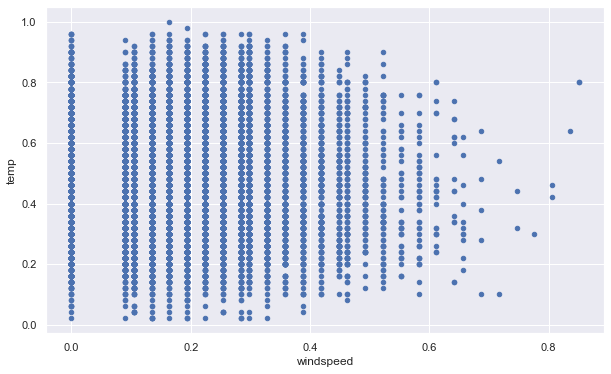

In [6]:
bikes.plot(kind='scatter', x='windspeed', y='temp')

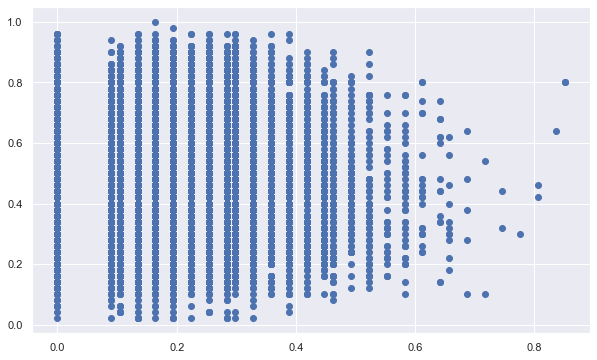

In [5]:
#ANSWER
plt.scatter(bikes['windspeed'], bikes['temp'])

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

Text(0, 0.5, 'temp')

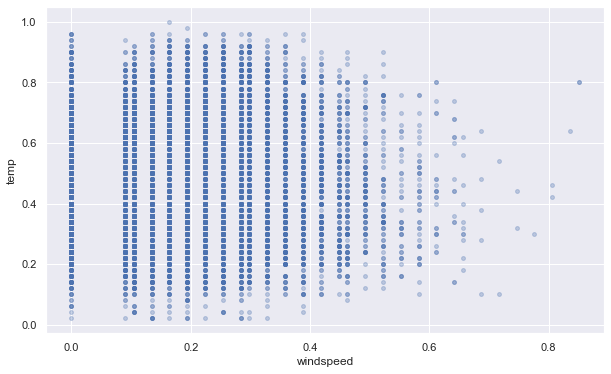

In [27]:
#ANSWER
plt.scatter(bikes['windspeed'], bikes['temp'], s = 15, linewidths = 1.0, alpha = 0.3)
plt.xlabel('windspeed')
plt.ylabel('temp')

<AxesSubplot:ylabel='Frequency'>

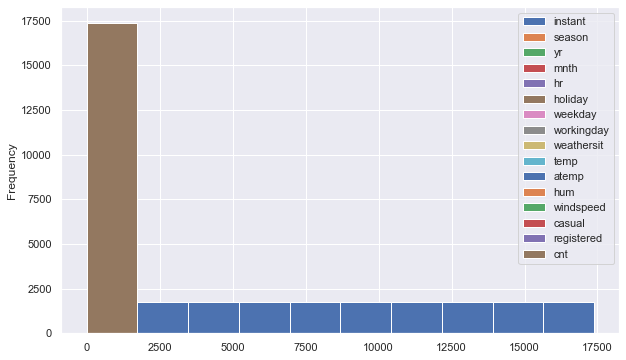

In [7]:
bikes.plot(kind = 'hist')

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

(array([2165., 1394., 1442., 2181., 1454., 1457., 2188., 1458., 1456.,
        2184.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

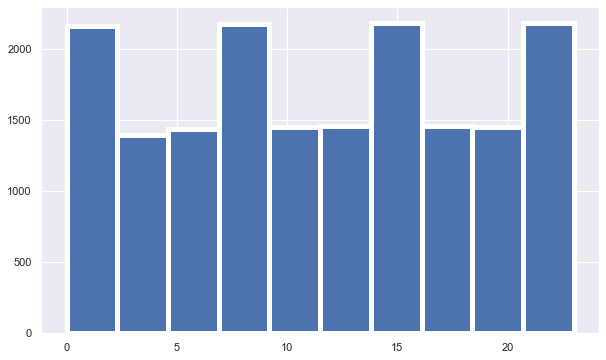

In [9]:
#ANSWER
#plt.hist(bikes['temp'],bins = 20, color = 'red', label='Normalized temp', alpha = 0.7)

plt.hist(bikes['hr'], linewidth = 5, alpha = 1)

(array([  78.,  786., 2342., 2631., 3047., 3216., 3942., 1044.,  279.,
          14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

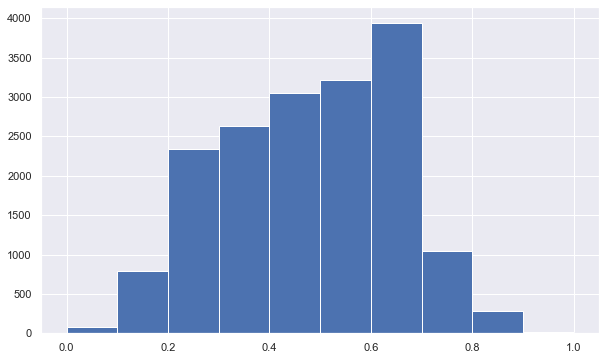

In [30]:
plt.hist(bikes['atemp'])

What do the horizontal and vertical axes represent?

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

<AxesSubplot:>

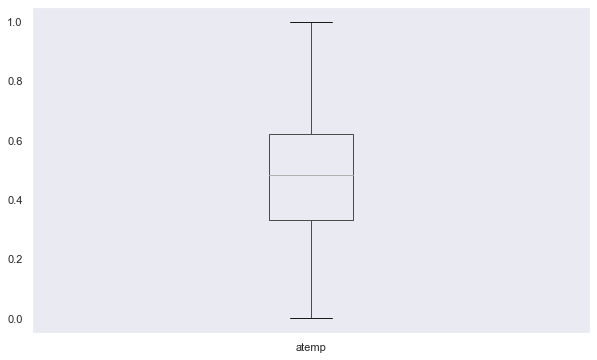

In [11]:
#ANSWER
#df.boxplot(by ='day', column =['total_bill'], grid = False)
bikes.boxplot(column = ['atemp'], grid = False)

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

<AxesSubplot:>

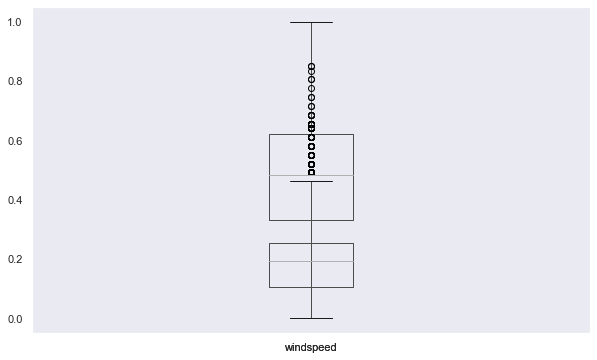

In [12]:
#ANSWER
#fig, ax1 = plt.subplots(figsize=(10, 7))
#x = [bikes['atemp'],bikes['windspeed']]
#plt.boxplot(x=x,  data = bikes)
#ax1.set(title = 'atemp vs windspeed boxplot',
       #xlabel = 'Distribution',
       #ylabel = 'values')
#ax1.set_xticklabels(['atemp','windspeed']);

bikes.boxplot(column = ['atemp'], grid = False)
bikes.boxplot(column = ['windspeed'], grid = False)

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [41]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",", 
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [42]:
#ANSWER
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [43]:
#ANSWER
iris_data['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [ ]:
#ANSWER


We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [44]:
#ANSWER 
iris_data.groupby('sepal_length').mean()

,sepal_width,petal_length,petal_width
sepal_length,,,
4.3,3.000000,1.100000,0.100000
4.4,3.033333,1.333333,0.200000
4.5,2.300000,1.300000,0.300000
4.6,3.325000,1.325000,0.225000
4.7,3.200000,1.450000,0.200000
4.8,3.180000,1.580000,0.200000
4.9,2.866667,2.283333,0.533333
5.0,3.120000,1.840000,0.430000
5.1,3.477778,1.722222,0.400000


In [45]:
iris_data.groupby('sepal_width').mean()

,sepal_length,petal_length,petal_width
sepal_width,,,
2.0,5.000000,3.500000,1.000000
2.2,6.066667,4.500000,1.333333
2.3,5.325000,3.250000,0.975000
2.4,5.300000,3.600000,1.033333
2.5,5.762500,4.512500,1.550000
2.6,6.160000,4.880000,1.420000
2.7,5.855556,4.622222,1.555556
2.8,6.335714,5.042857,1.707143
2.9,6.060000,4.350000,1.320000


In [16]:
iris_data.groupby(['species'])[['sepal_length','sepal_width']].mean()


,sepal_length,sepal_width
species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

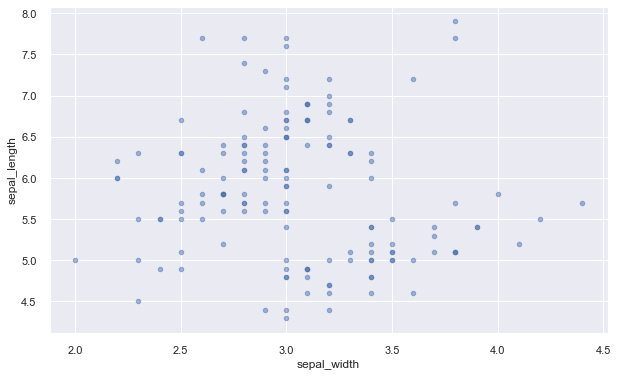

In [46]:
#ANSWER
iris_data.plot('sepal_width', 'sepal_length', kind = 'scatter', alpha = 0.5)

**Draw a Barplot showing sepal width and length using the Pandas plot method.**

<AxesSubplot:>

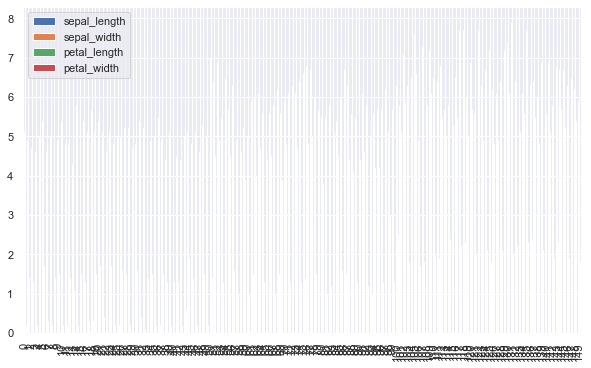

In [82]:
#ANSWER
iris_data.plot(kind = 'bar', alpha = 1,)

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sepal'}, xlabel='sepal_width', ylabel='sepal_length'>

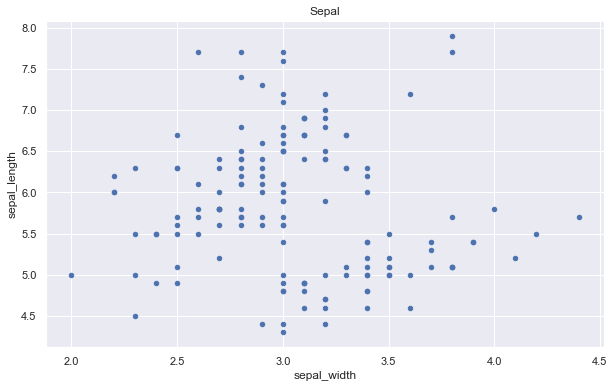

In [78]:
#ANSWER
iris_data.plot('sepal_width', 'sepal_length', kind = 'scatter', title = 'Sepal')

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

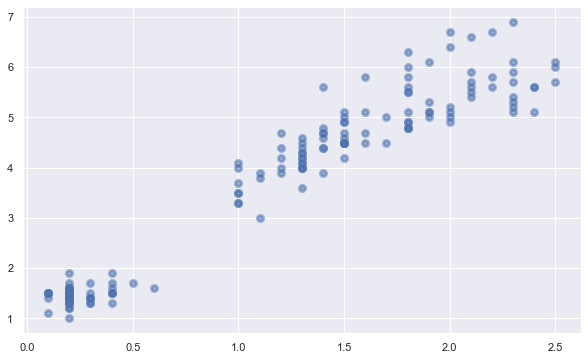

In [87]:
#ANSWER
plt.scatter(iris_data['petal_width'], iris_data['petal_length'], alpha = 0.5, linewidth = 3)

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

In [ ]:
#seaborn.lmplot(x, y, data, hue=None, col=None, row=None, **kwargs)

In [ ]:
#Syntax : seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers=’o’, sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci=’ci’, scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)

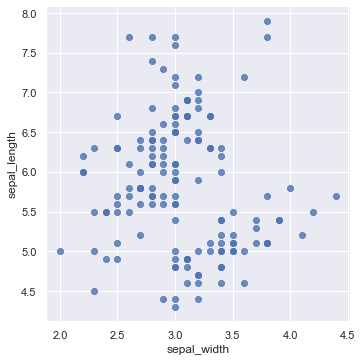

In [102]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris_data, hue = None, fit_reg = False)

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

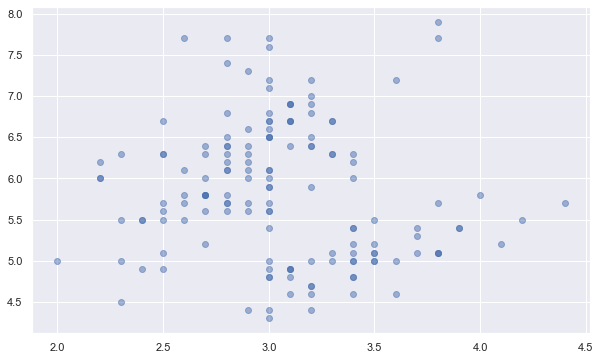

In [100]:
# ANSWER
plt.scatter(iris_data['sepal_width'], iris_data['sepal_length'], alpha = 0.5)
plt.xlabel = 'sepal_width'
plt.ylabel = 'sepal_length'

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

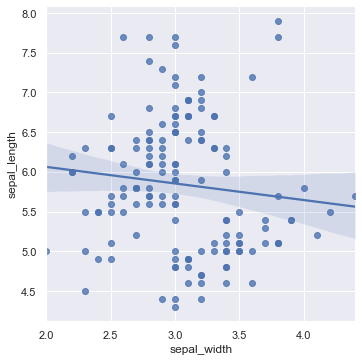

In [103]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris_data, hue = None, fit_reg = True)

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

In [ ]:
# ANSWER
#sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
#seaborn.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)

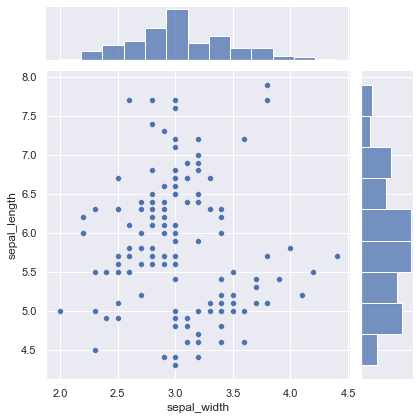

In [104]:
sns.jointplot(data=iris_data, x='sepal_width', y='sepal_length',  hue = None)

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

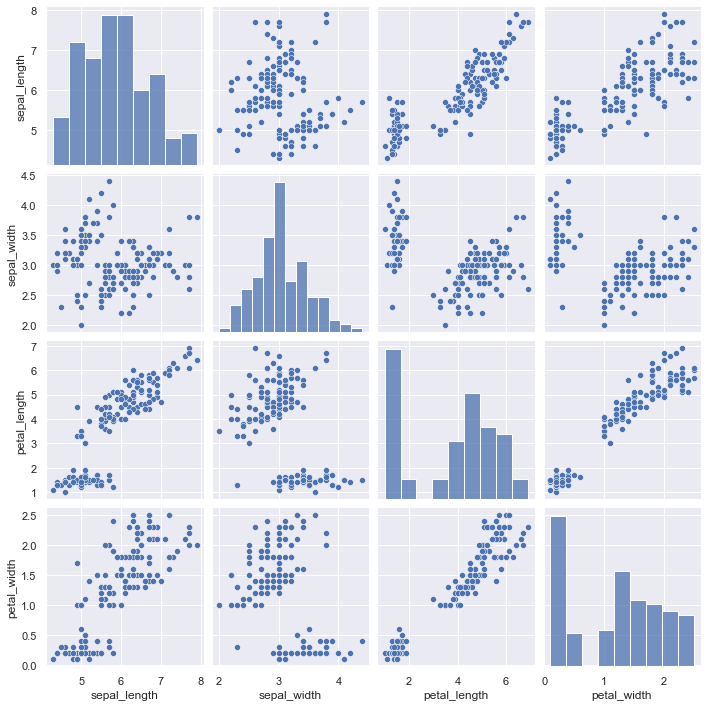

In [105]:
# ANSWER
#sns.pairplot(df, hue = 'continent')
sns.pairplot(iris_data)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

C:\Users\BingBings\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\BingBings\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\BingBings\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\BingBings\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\BingBings\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\BingBings\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping de

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

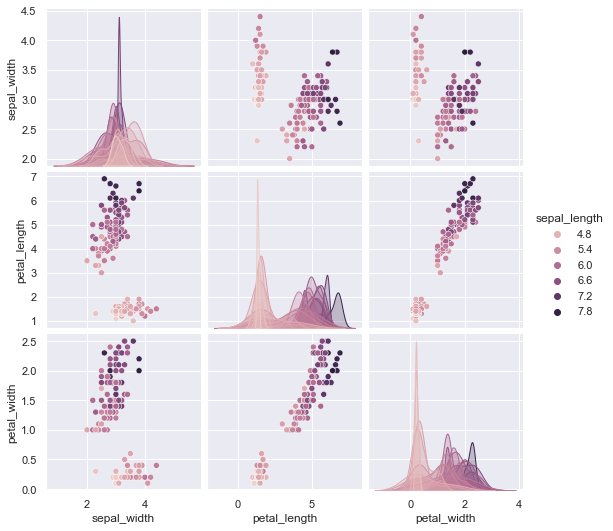

In [120]:
# ANSWER
sns.pairplot(iris_data, hue = 'sepal_length')
sns.color_palette("tab10")

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [121]:
# ANSWER
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

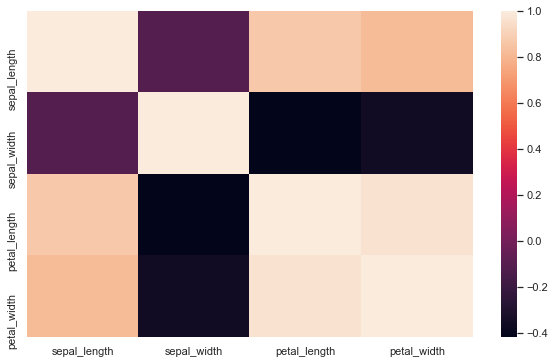

In [17]:
sns.heatmap(iris_data.corr())

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install pandas_profiling

In [32]:
conda install -c conda-forge pandas-profiling

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [27]:
# ANSWER
import pandas_profiling as pp
df = pd.read_csv("..\\DATA\\Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.866670, -64.550000)"


Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [34]:
#pandas_profiling.ProfileReport(df, **kwargs)
pp.ProfileReport(df)

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [ ]:
# ANSWER
#pydqc is an automatic data quality check package written in Python. 
#It acts as an easy-to-use data summary framework, which could, to some extent, 
#relieve us from the pain of writing tedious codes for general data understanding. 
#conda install -c conda-forge pyqt

For **HOMEWORK**: check out the `pydqc` library.

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [132]:
airpass = pd.read_csv('..\\DATA\\AirPassengers.csv')
airpass.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [133]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [138]:
# ANSWER
airpass['TravelDate'] = pd.to_datetime(airpass['TravelDate'])
airpass

,TravelDate,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Set `TravelDate` as index

In [145]:
# ANSWER
airpass1 = airpass.set_index('TravelDate')
airpass1

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [146]:
# ANSWER
airpass1.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Here's how to see the values of the index:

In [147]:
airpass.index

RangeIndex(start=0, stop=144, step=1)

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [153]:
ts = airpass1['Passengers']
ts

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

We use the datetime index exactly like a row number index:

In [154]:
print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [155]:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [156]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

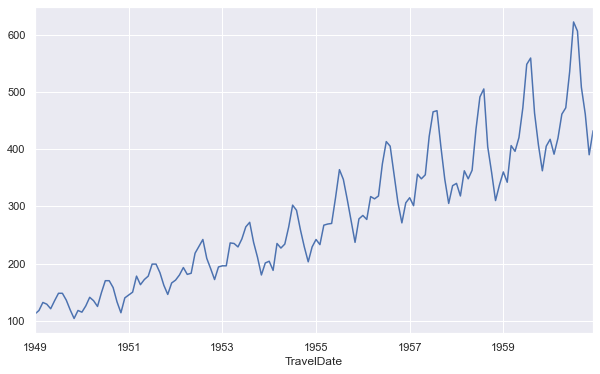

In [157]:
ts.plot();

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [162]:
conda install -c conda-forge folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\BingBings\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.12.0              |     pyhd8ed1ab_1          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.12.0-pyhd8ed1ab_1




Note: you may need to restart the kernel to use updated packages.
folium-0.12.0        | 64 KB     |            |   0% 
folium-0.12.0        | 64 KB     | ########## | 100% 
folium-0.12.0        | 64 KB     | ########## | 100% 


In [73]:
import folium

In [36]:
# Read SF Incidents data
crime_csv = pd.read_csv('..\\DATA\\SFPD_Incidents_-_Current_Year__2015_.csv')
crime_csv

FileNotFoundError: [Errno 2] No such file or directory: '..\\DATA\\SFPD_Incidents_-_Current_Year__2015_.csv'

In [37]:
# Read SF Incidents data
crime_csv = pd.read_csv('../DATA/SFPD_Incidents-Current_Year_2015.csv')
crime_csv

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,09/20/2015,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
1,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
3,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
4,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
...,...,...,...,...,...,...,...,...,...,...,...,...
112326,150007653,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,01/02/2015,00:01,TENDERLOIN,NONE,400 Block of EDDY ST,-122.415067,37.783563,"(37.7835634796332, -122.41506687647)"
112327,150008457,NON-CRIMINAL,LOST PROPERTY,Friday,01/02/2015,00:01,PARK,NONE,3600 Block of 16TH ST,-122.434221,37.764224,"(37.7642237070482, -122.434221184718)"
112328,150005538,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,01/02/2015,00:01,MISSION,"ARREST, BOOKED",900 Block of POTRERO AV,-122.406870,37.757290,"(37.7572895904578, -122.406870402082)"
112329,150005306,NON-CRIMINAL,LOST PROPERTY,Friday,01/02/2015,00:01,CENTRAL,NONE,700 Block of VALLEJO ST,-122.409792,37.798508,"(37.7985083480435, -122.409791662293)"


Convert `Date` Column to DateTime and set as index 

In [49]:
# ANSWER
crime_csv['Date'] = pd.to_datetime(crime_csv['Date'])
crime_csv

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,2015-09-20,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
1,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,2015-09-20,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,2015-09-20,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
3,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,2015-09-20,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
4,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,2015-09-20,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
...,...,...,...,...,...,...,...,...,...,...,...,...
112326,150007653,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,2015-01-02,00:01,TENDERLOIN,NONE,400 Block of EDDY ST,-122.415067,37.783563,"(37.7835634796332, -122.41506687647)"
112327,150008457,NON-CRIMINAL,LOST PROPERTY,Friday,2015-01-02,00:01,PARK,NONE,3600 Block of 16TH ST,-122.434221,37.764224,"(37.7642237070482, -122.434221184718)"
112328,150005538,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,2015-01-02,00:01,MISSION,"ARREST, BOOKED",900 Block of POTRERO AV,-122.406870,37.757290,"(37.7572895904578, -122.406870402082)"
112329,150005306,NON-CRIMINAL,LOST PROPERTY,Friday,2015-01-02,00:01,CENTRAL,NONE,700 Block of VALLEJO ST,-122.409792,37.798508,"(37.7985083480435, -122.409791662293)"


In [50]:
crime_csv1 = crime_csv.set_index('Date')
crime_csv1

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location
Date,,,,,,,,,,,
2015-09-20,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
2015-09-20,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
...,...,...,...,...,...,...,...,...,...,...,...
2015-01-02,150007653,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,00:01,TENDERLOIN,NONE,400 Block of EDDY ST,-122.415067,37.783563,"(37.7835634796332, -122.41506687647)"
2015-01-02,150008457,NON-CRIMINAL,LOST PROPERTY,Friday,00:01,PARK,NONE,3600 Block of 16TH ST,-122.434221,37.764224,"(37.7642237070482, -122.434221184718)"
2015-01-02,150005538,OTHER OFFENSES,TRAFFIC VIOLATION,Friday,00:01,MISSION,"ARREST, BOOKED",900 Block of POTRERO AV,-122.406870,37.757290,"(37.7572895904578, -122.406870402082)"


Draw a timeseries plot to visualize number of crimes for each day.

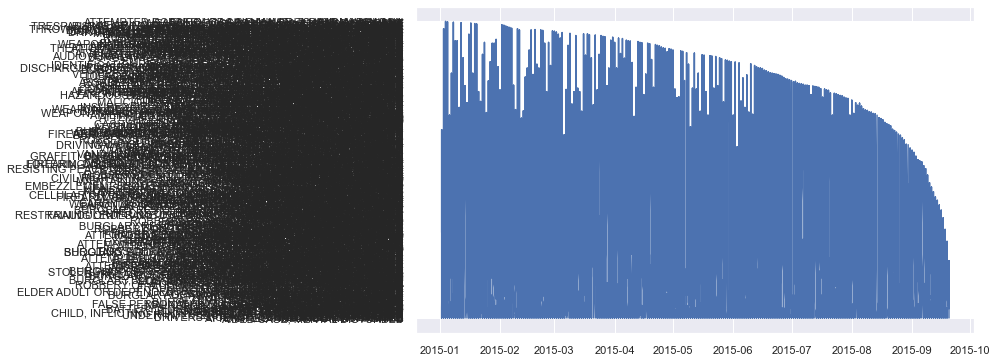

In [51]:
# ANSWER
#dataframe.plot(subplots=True, figsize=(12, 15))
#plt.plot(crime_csv1['Date'])
plt.plot(crime_csv1['Descript'])

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

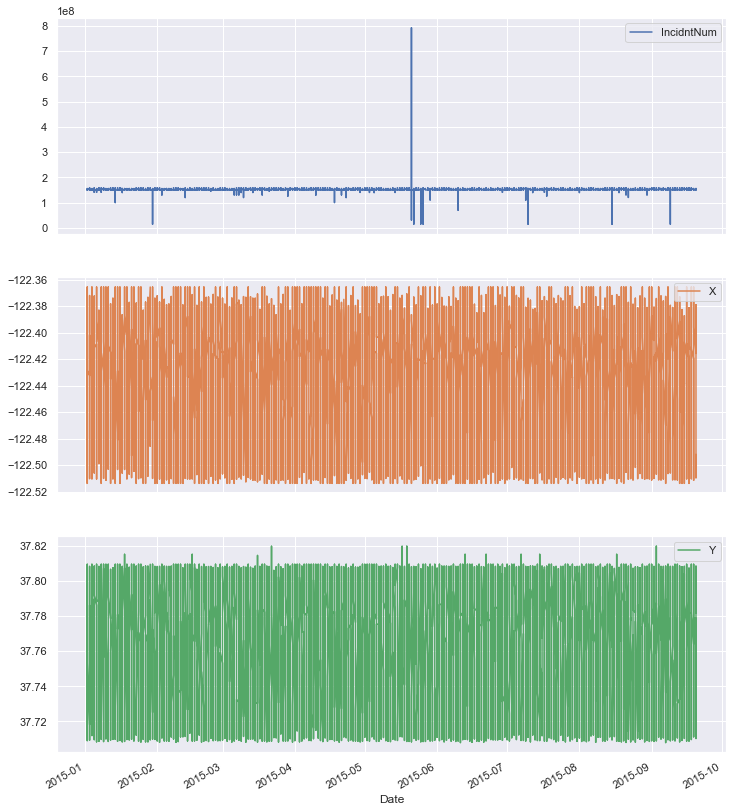

In [183]:
crime_csv1.plot(subplots=True, figsize=(12, 15))

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [75]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [76]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [56]:
crime_csv1.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location
Date,,,,,,,,,,,
2015-09-20,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
2015-09-20,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,OTHER OFFENSES,INDECENT EXPOSURE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827138,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,23:40,NORTHERN,"ARREST, BOOKED",GOUGH ST / GEARY BL,-122.424689,37.785334,"(37.7853339640306, -122.424688703591)"
2015-09-20,150830169,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,23:21,RICHMOND,NONE,3400 Block of CLAY ST,-122.449685,37.788804,"(37.7888040447734, -122.449684751771)"
2015-09-20,150830169,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Sunday,23:21,RICHMOND,NONE,3400 Block of CLAY ST,-122.449685,37.788804,"(37.7888040447734, -122.449684751771)"


In [63]:
for i in range(0, 100):
    print([crime_csv1.iloc[i]['Y']], [crime_csv1.iloc[i]['X']], [crime_csv1.iloc[i]['Category']])

[37.781755725592106] [-122.491851328976] ['NON-CRIMINAL']
[37.712616576623894] [-122.413676487435] ['ASSAULT']
[37.712616576623894] [-122.413676487435] ['ASSAULT']
[37.712616576623894] [-122.413676487435] ['ASSAULT']
[37.712616576623894] [-122.413676487435] ['ASSAULT']
[37.712616576623894] [-122.413676487435] ['OTHER OFFENSES']
[37.7853339640306] [-122.424688703591] ['OTHER OFFENSES']
[37.7888040447734] [-122.44968475177099] ['VANDALISM']
[37.7888040447734] [-122.44968475177099] ['DRUNKENNESS']
[37.7211650807414] [-122.437461502349] ['WARRANTS']
[37.77463542236271] [-122.44443220795401] ['MISSING PERSON']
[37.77463542236271] [-122.44443220795401] ['MISSING PERSON']
[37.7749906792593] [-122.410065781604] ['OTHER OFFENSES']
[37.7744552453738] [-122.430851581702] ['NON-CRIMINAL']
[37.7535645746594] [-122.395635436168] ['DRUG/NARCOTIC']
[37.7535645746594] [-122.395635436168] ['ASSAULT']
[37.7535645746594] [-122.395635436168] ['ASSAULT']
[37.7882933915158] [-122.40840385989901] ['OTHER OFFE

In [77]:
# ANSWER
# add marker one by one on the map
for i in range(0,100):
   folium.Marker(
    location=[crime_csv1.iloc[i]['Y'], crime_csv1.iloc[i]['X']],
    popup=crime_csv1.iloc[i]['Category'],
   ).add_to(base_map)

# Show the map again
display(base_map)

In [ ]:
# add marker one by one on the map
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
   ).add_to(m)

# Show the map again
m

#for i in range(0, 10):
    print([crimedata.iloc[i]['Y'],


Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [78]:
# ANSWER
for i in range(0,100):
   folium.Circle(
    location=[crime_csv1.iloc[i]['Y'], crime_csv1.iloc[i]['X']],
    popup=crime_csv1.iloc[i]['Category'],
   ).add_to(base_map)

# Show the map again
display(base_map)

[BONUS] Create a heatmap of the incident happened in SF.

**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

In [ ]:
# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)